#**Bank mijozlarining noroziligini bashorat qilish**

**Tavsifi**

Bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

import joblib

In [47]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


Ma'lumotlarni tahlil qilamiz

In [4]:
df.shape

(10000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


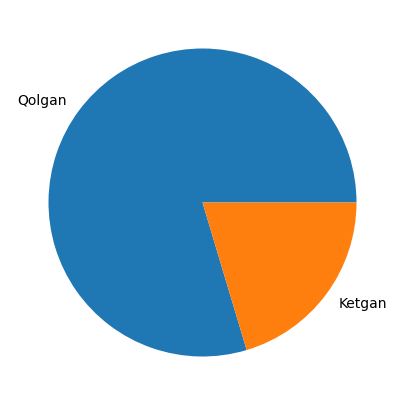

In [8]:
churn_rate = df['Exited'].value_counts() / len(df)*100

plt.figure(figsize=(5,5))
plt.pie(churn_rate,labels=['Qolgan','Ketgan'])
plt.show()

Ba'zi sonli ustunlarni tahlil qilamiz

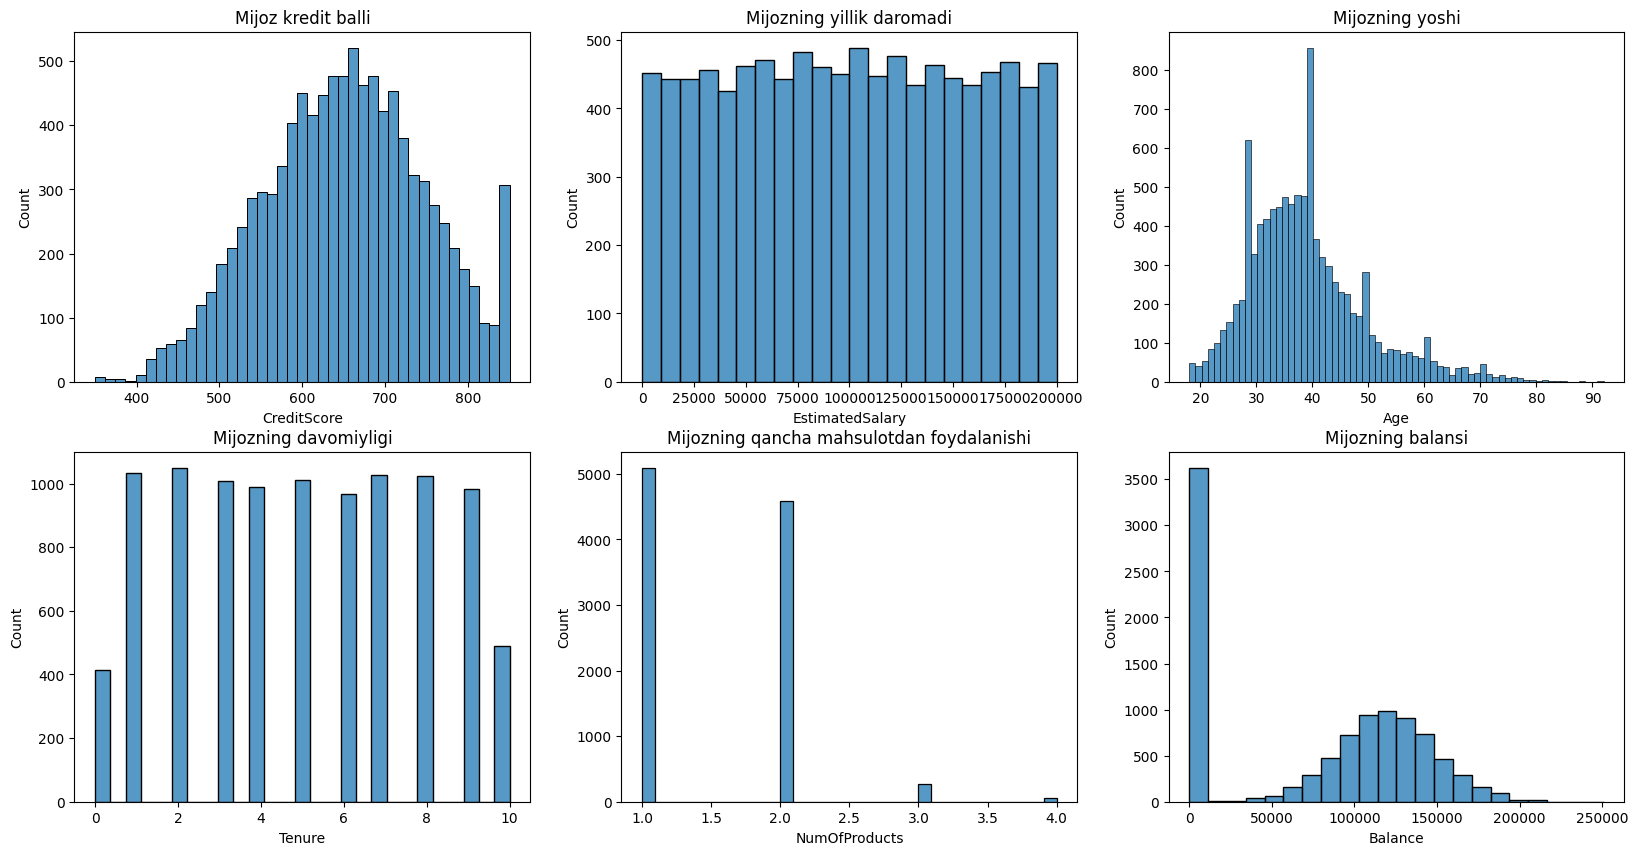

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df['CreditScore'], ax=axes[0, 0])
axes[0, 0].set_title("Mijoz kredit balli")

sns.histplot(df['EstimatedSalary'], ax=axes[0, 1])
axes[0, 1].set_title("Mijozning yillik daromadi")

sns.histplot(df['Age'], ax=axes[0, 2])
axes[0, 2].set_title("Mijozning yoshi")

# Row 1
sns.histplot(df['Tenure'], ax=axes[1, 0])
axes[1, 0].set_title("Mijozning davomiyligi")

sns.histplot(df['NumOfProducts'], ax=axes[1, 1])
axes[1, 1].set_title("Mijozning qancha mahsulotdan foydalanishi")

sns.histplot(df['Balance'], ax=axes[1, 2])
axes[1, 2].set_title("Mijozning balansi")

plt.show()

Kategoriyali ustunlarni tahlil qilamiz

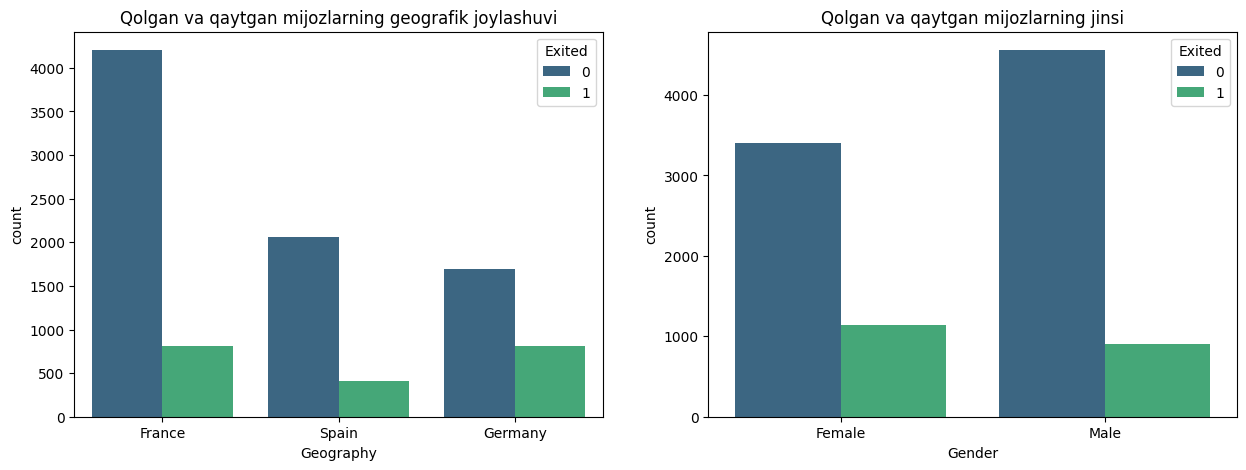

In [31]:
fig,axes = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Geography',hue='Exited',palette='viridis', data=df,ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozlarning geografik joylashuvi")

sns.countplot(x='Gender',hue='Exited',palette='viridis', data=df,ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning jinsi")

plt.show()

Korrelyatsiya

In [35]:
numeric_df = df.select_dtypes(include=['number'])
correlation = numeric_df.corrwith(df['Exited']).abs().sort_values(ascending=False)
print(correlation)

Exited             1.000000
Age                0.285323
IsActiveMember     0.156128
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
HasCrCard          0.007138
CustomerId         0.006248
dtype: float64


ML ga tayyorgarlik.

In [49]:
#Model uchun keraksiz ustunlarni o'chiramiz
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Matnli ustunlarni songa o'tkazmiz (One-hot encoding)
encoded = pd.get_dummies(data)
encoded.head()

# X,y
X = encoded.drop('Exited',axis=1)
y = encoded['Exited']

# Standartizatsiya qilinishi kerak bo'lgan asosiy sonli ustunlar
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])

Train \ Test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model aniqligi LR: 0.808


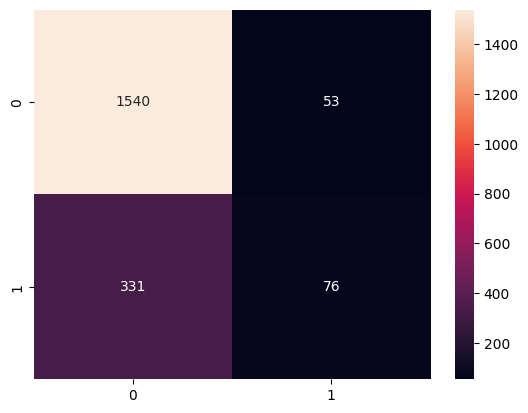

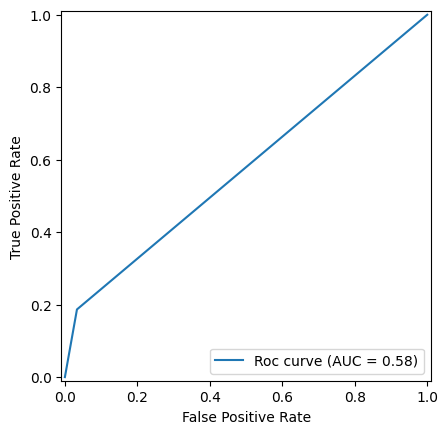

In [76]:
# Model yaratish va o'qitish
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

# Bashorat
y_pred = LR_model.predict(X_test)

print(classification_report(y_test,y_pred))
print(f"Model aniqligi LR: {metrics.accuracy_score(y_test,y_pred)}")

# Conifusion Matrix
conf_mat = metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

# Roc curve
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc curve')
display.plot()
plt.show()

Support Vector Machines

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.85      0.40      0.55       407

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000

Model aniqligi SVM: 0.864


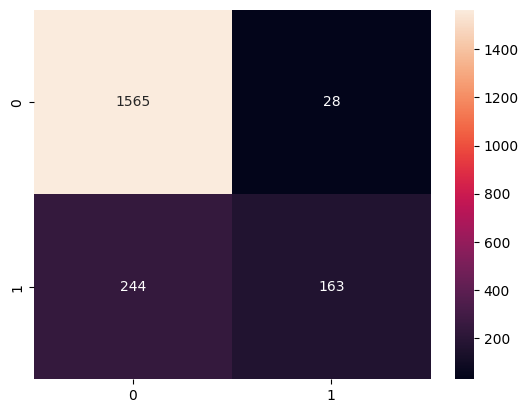

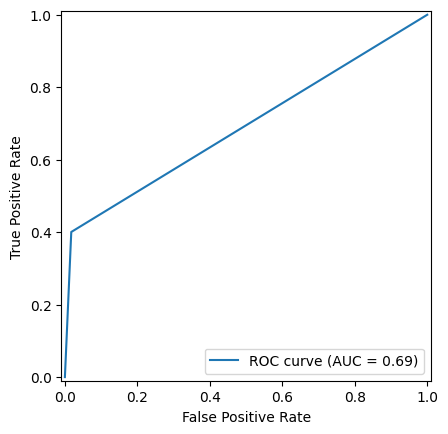

In [77]:
# Modelni yaratamiz va o'qitamiz
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi SVM:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1593
           1       0.48      0.53      0.50       407

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

Model aniqligi Tree: 0.787


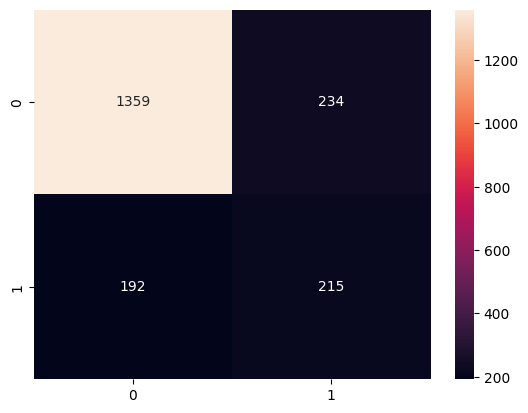

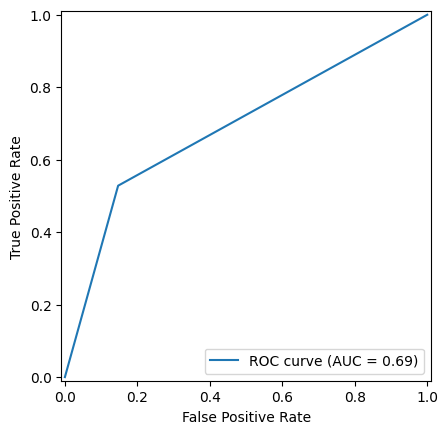

In [78]:
# Modelni yaratamiz va o'qitamiz
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi Tree:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Model aniqligi RF: 0.861


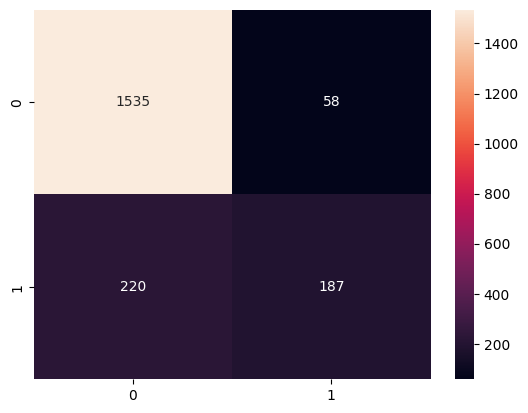

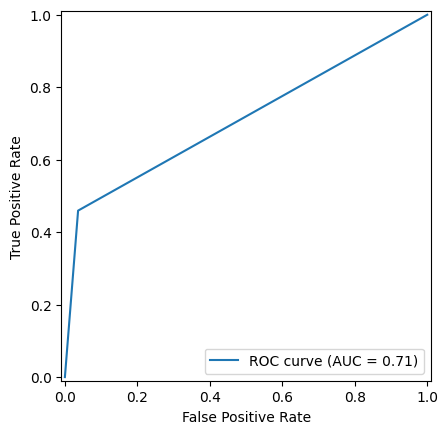

In [79]:
# Modelni yaratamiz va o'qitamiz
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi RF:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.69      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Model aniqligi XGB: 0.851


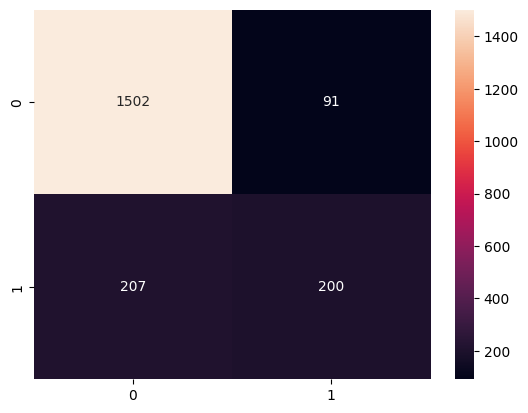

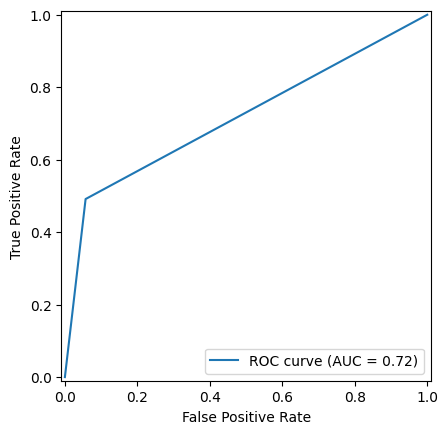

In [80]:
# Modelni yaratamiz va o'qitamiz
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi XGB:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

/tmp/ipython-input-1279979679.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


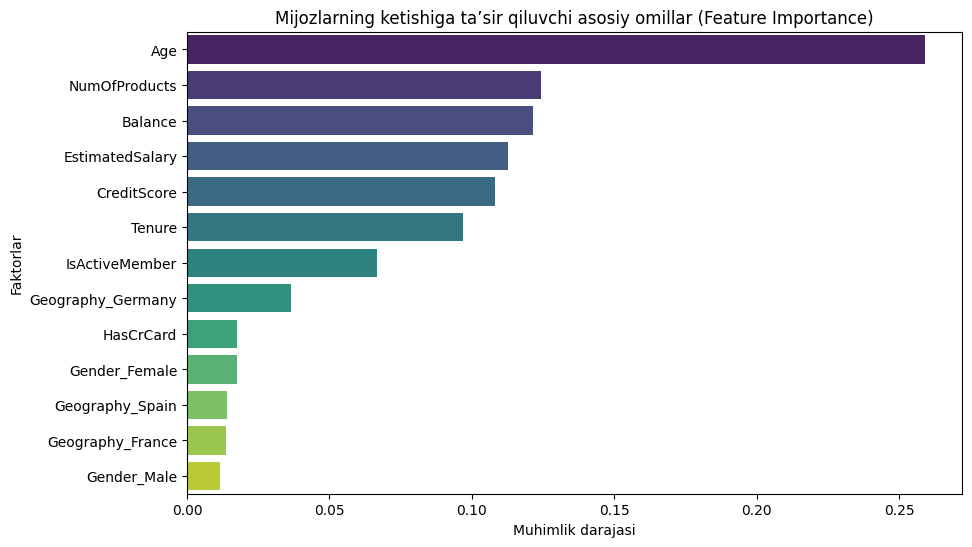

In [81]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Grafikni chizish
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Mijozlarning ketishiga ta’sir qiluvchi asosiy omillar (Feature Importance)')
plt.xlabel('Muhimlik darajasi')
plt.ylabel('Faktorlar')
plt.show()

In [84]:
# Modelni saqlab olish

joblib.dump(xgb_model, 'bank_churn_xgb_model.pkl')

joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

**Xulosa: Umumiy aniqlik (Accuracy) bo'yicha SVM yetakchi, biroq bank uchun eng muhim ko'rsatkich bu Recall (ketmoqchi bo'lgan mijozlarni necha foiz topa olish). Bu borada XGBoost va Random Forest eng yaxshi muvozanatni (F1-score: 0.57) ko'rsatmoqda. Bank mijozlarini ushlab qolish uchun XGBoost modelini tanlash maqsadga muvofiq, chunki u ketayotgan mijozlarning deyarli yarmini (49%) aniqlay oladi.**